In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [12]:
# each point is length, width, type (0, 1)

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5,  1,  1],
        [1,    1,  0]]

mystery_flower = [4.5, 1]

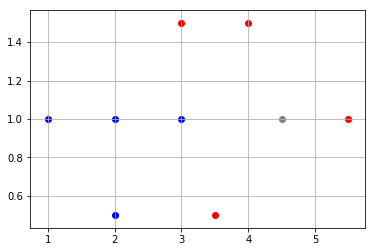

In [13]:
# scatter plot them
def vis_data():
    plt.grid()

    for i in range(len(data)):
        c = 'r'
        if data[i][2] == 0:
            c = 'b'
        plt.scatter([data[i][0]], [data[i][1]], c=c)

    plt.scatter([mystery_flower[0]], [mystery_flower[1]], c='gray')

vis_data()

In [14]:
# network

#       o  flower type
#      / \  w1, w2, b
#     o   o  length, width


# activation function

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

x = np.linspace(-5, 5, 100)
print(x);print('\n')
print(sigmoid(x));print('\n')
print(sigmoid_p(x))

[-5.         -4.8989899  -4.7979798  -4.6969697  -4.5959596  -4.49494949
 -4.39393939 -4.29292929 -4.19191919 -4.09090909 -3.98989899 -3.88888889
 -3.78787879 -3.68686869 -3.58585859 -3.48484848 -3.38383838 -3.28282828
 -3.18181818 -3.08080808 -2.97979798 -2.87878788 -2.77777778 -2.67676768
 -2.57575758 -2.47474747 -2.37373737 -2.27272727 -2.17171717 -2.07070707
 -1.96969697 -1.86868687 -1.76767677 -1.66666667 -1.56565657 -1.46464646
 -1.36363636 -1.26262626 -1.16161616 -1.06060606 -0.95959596 -0.85858586
 -0.75757576 -0.65656566 -0.55555556 -0.45454545 -0.35353535 -0.25252525
 -0.15151515 -0.05050505  0.05050505  0.15151515  0.25252525  0.35353535
  0.45454545  0.55555556  0.65656566  0.75757576  0.85858586  0.95959596
  1.06060606  1.16161616  1.26262626  1.36363636  1.46464646  1.56565657
  1.66666667  1.76767677  1.86868687  1.96969697  2.07070707  2.17171717
  2.27272727  2.37373737  2.47474747  2.57575758  2.67676768  2.77777778
  2.87878788  2.97979798  3.08080808  3.18181818  3

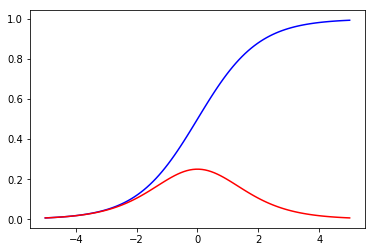

In [15]:
plt.plot(x, sigmoid(x), c="b") # sigmoid in blue
plt.plot(x, sigmoid_p(x), c="r") # sigmoid_p in red

In [21]:
def train():
    #random init of weights
    w1 = np.random.randn()
    w2 = np.random.randn()
    b = np.random.randn()
    
    iterations = 10000
    learning_rate = 0.1
    costs = [] # keep costs during training, see if they go down
    c=0
    for i in range(iterations):
        # get a random point
        ri = np.random.randint(len(data))
        point = data[ri]
        
        z = point[0] * w1 + point[1] * w2 + b
        pred = sigmoid(z) # networks prediction
        
        target = point[2]
        
        # cost for current random point
        cost = np.square(pred - target)
        
        for j in range(len(data)):
            p = data[j]
            p_pred = sigmoid(w1 * p[0] + w2 * p[1] + b)
            c += np.square(p_pred - p[2])
        costs.append(c)
                
        dcost_dpred = 2 * (pred - target)
        dpred_dz = sigmoid_p(z)
        
        dz_dw1 = point[0]
        dz_dw2 = point[1]
        dz_db = 1
        
        dcost_dz = dcost_dpred * dpred_dz
        
        dcost_dw1 = dcost_dz * dz_dw1
        dcost_dw2 = dcost_dz * dz_dw2
        dcost_db = dcost_dz * dz_db
        
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b = b - learning_rate * dcost_db
        
    return costs, w1, w2, b
        


In [22]:
costs, w1, w2, b = train()

In [23]:
costs

[3.877680032557055,
 7.745234472618859,
 11.614475291787679,
 15.475042857748026,
 19.33744373046372,
 23.195500325936376,
 27.05460977962959,
 30.900489525515855,
 34.7485024223587,
 38.59772406138919,
 42.4474793474393,
 46.29776330663384,
 50.14984558121005,
 53.99427772826994,
 57.83019705880625,
 61.66846545321777,
 65.48958560984006,
 69.31326566547962,
 73.11677681558253,
 76.90980504729076,
 80.67564753170991,
 84.41666278383279,
 88.12781825567576,
 91.84552656116448,
 95.5694975112969,
 99.29877498031956,
 102.9837672652344,
 106.63557907659579,
 110.24225501153465,
 113.79111842177197,
 117.26166722689746,
 120.62846524815546,
 123.8594261231434,
 127.12943188586651,
 130.427374259527,
 133.5493273730881,
 136.71395021949078,
 139.90568833691077,
 142.84108970596176,
 145.42982290697336,
 147.6128222926179,
 149.92539991386593,
 152.3593156086923,
 154.84666516494218,
 156.88539078417335,
 158.54451851224616,
 160.06335058893677,
 161.54125095959088,
 163.08837062916317,
 16

In [24]:
# predict what the myster flower is!

z = w1 * mystery_flower[0] + w2 * mystery_flower[1] + b
pred = sigmoid(z)

print(pred)
print("close to 0 -> blue, close to 1 -> red")

0.9837536234458988
close to 0 -> blue, close to 1 -> red


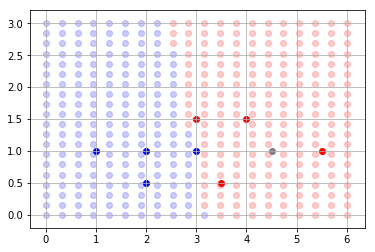

In [26]:
# check out the networks predictions in the x,y plane
for x in np.linspace(0, 6, 20):
    for y in np.linspace(0, 3, 20):
        pred = sigmoid(w1 * x + w2 * y + b)
        c = 'b'
        if pred > .5:
            c = 'r'
        plt.scatter([x],[y],c=c, alpha=.2)
        
# plot points over network predictions
# you should see a split, with half the predictions blue
# and the other half red.. nicely predicting each data point
vis_data()